In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# This cell defines the kernel function phi which is a scaled gaussian function with one free parameter
# "epsilon". It takes as input any single "r" or a vector of "r" scalars in the form of a vector

def phi(eps, r):
    
    phi_at_r = np.exp(-(eps*r)**2)
    
    return phi_at_r

In [3]:
# The makePhiMatrix takes in an array of xPts, the "phi" kernel function from the previous cell and its epsilon
# parameter and returns the RBF basis function matrix "B" as defined in the Wiki page:
# https://en.wikipedia.org/wiki/Radial_basis_function_interpolation

def makePhiMatrix(xPts, kernel, eps):
    
    n = len(xPts)           # how many pts there are
    
    r, c = np.meshgrid(np.arange(n), np.arange(n))
    r    = r.flatten()
    c    = c.flatten()
    
    B = phi(eps, xPts[r]-xPts[c])
    
    B = B.reshape(n, n)
    
    return B

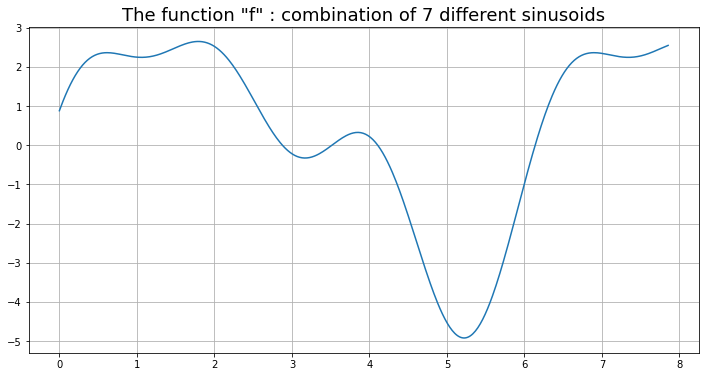

In [4]:
# Now we make the function "f" that we wish to approximate with the RBF gaussian kernel

N = 500                                     # Number of sample points in the function "f"
eps = 1.5                                   # The epsilon parameter of the phi() kernel function

theta = np.linspace(0, 2.5*np.pi, N)        # The xPts at which the function "f" is originally sampled/spaced


# Array of the 7 frequencies of the 7 sinusoids that are going to be combined (added) to produce f
omega = np.array([      1,       2,        1,       1,       3,        2,        1])         # omega = frequencies

# Array of the 7 phase displacements of the 7 sinusoids that are going to be combined (added) to produce f
phase = np.array([np.pi/5, np.pi/3, -np.pi/4, np.pi/5, np.pi/2, -np.pi/5, -np.pi/3])         # phase displacements


# Initializing the N point vector f = the function which will be approximated with the rbf kernels later!
f = np.zeros_like(theta)

# Creating "f" by sequentially adding together 7 sinusoids with different frequencies and phases
for i in range(len(omega)):
    # Adding each of the sinusoids that are combined to produce the combined "f" function, each defined by 
    # the frequency omega[i] and with phase displacement phase[i]
    f += np.sin(theta*omega[i] + phase[i])

    
# Plotting the function "f" that we're going to be approximating
plt.figure(figsize=(12,6))
plt.plot(theta, f)
plt.title('The function "f" : combination of 7 different sinusoids', fontsize=18)
plt.grid(True)
plt.show()

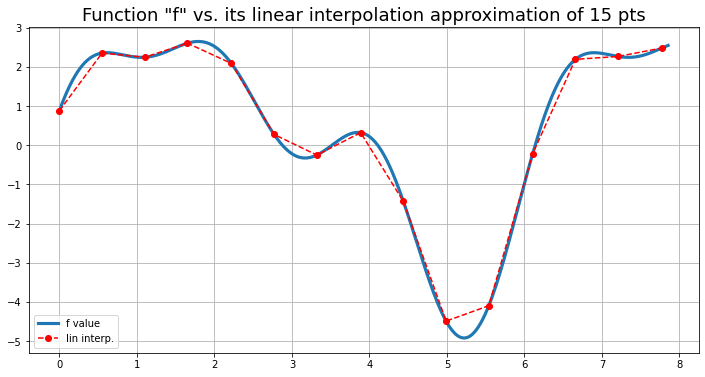

In [19]:
# Sample some "n" of the N points that make up the function "f"

numSamp = 15

n = N // numSamp        # closest multiple of numSamp lesser than N 

sampInd  = np.linspace(0, numSamp*n-1, numSamp).astype(int)      # sample indices at intervals of n

fSamples = f[sampInd]                                            # the "f" values at those uniformly sampled indices

plt.figure(figsize=(12,6))
plt.plot(theta, f, linewidth=3.15, label='f value')
plt.plot(theta[sampInd], fSamples, '--r', marker='o', label='lin interp.')
plt.title('Function "f" vs. its linear interpolation approximation of {} pts'.format(numSamp), fontsize=18)
plt.grid(True)
plt.legend()
plt.show()

In [16]:
# Setting up the problem to solve the weights:

xPts = theta[sampInd]                                # the numSamp number of theta (x) points are stored in xPts 

B = makePhiMatrix(xPts=xPts, kernel=phi, eps=eps)    # returns a [(N//n+1) x (N//n+1)] matrix

wts = np.linalg.inv(B) @ fSamples.reshape(-1,1)      # w = B_inv @ f      

print('shape of weights vector: ', wts.shape)

shape of weights vector:  (15, 1)


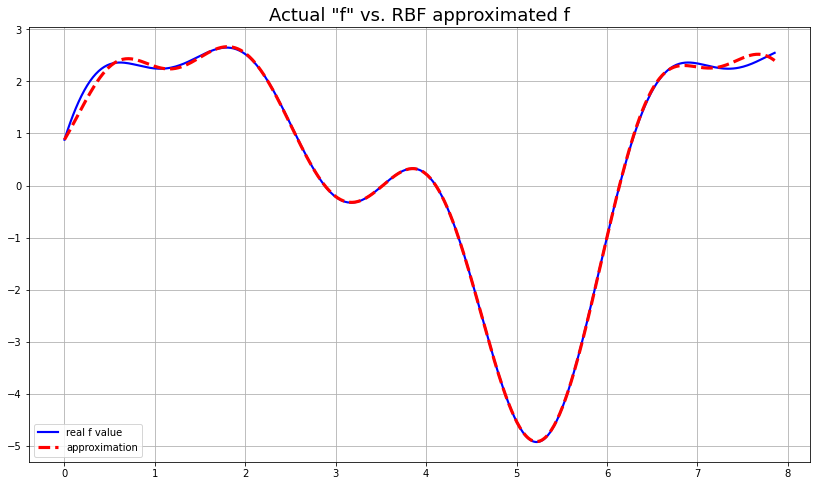

In [17]:
# Approximating the function using the weighted sum of the kernels

fApprx = np.zeros_like(theta)                       # initializing the approximated function with N zeros

i = 0
for x in theta:
    phi_r_x   = np.expand_dims(phi(eps, x-xPts), axis=1)   # 21 x 1 phi kernel vector evaluated at every x - xSampled
    fApprx[i] = phi_r_x.T @ wts                            # 1x21 @ 21x1 : phi(x-xSampled) @ weights
    i += 1

    
# Plotting the Approximated function
plt.figure(figsize=(14,8))
plt.plot(theta, f     , linewidth=2.15, color='b'                    , label='real f value')
plt.plot(theta, fApprx, linewidth=3.15, color='r', linestyle='dashed', label='approximation')
plt.title('Actual "f" vs. RBF approximated f', fontsize=18)
plt.legend()
plt.grid(True)
plt.show()

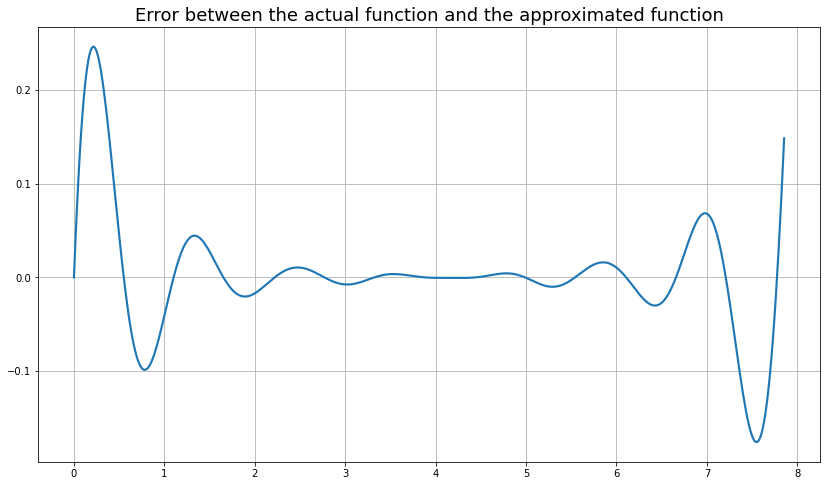

In [18]:
# Plotting the error

plt.figure(figsize=(14,8))
plt.plot(theta, f-fApprx, linewidth=2.15)
plt.title('Error between the actual function and the approximated function', fontsize=18)
plt.grid(True)
plt.show()